In [1]:
# ML > SL > Classification > Logistic Regression
################################################################################################
using Plots
gr(size= (600,600))

Plots.GRBackend()

In [2]:
# Utility functions
∑ = sum

sum (generic function with 17 methods)

### [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)
$$ σ(x) = \frac{1}{1 + e^{-x}} \qquad \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad \qquad\qquad\qquad\qquad\qquad$$

In [3]:
# Declare logistic (Sigmoid) curve σ
σ = x -> 1/ (1 + exp(-x))

#3 (generic function with 1 method)

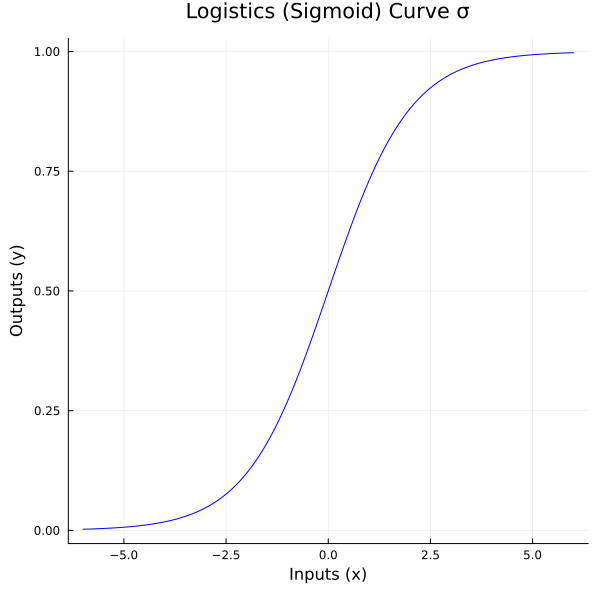

In [4]:
# plot logistic function
pₛ = plot(-6:0.1:6, σ,
    xlabel = "Inputs (x)",
    ylabel = "Outputs (y)",
    title = "Logistics (Sigmoid) Curve σ",
    legend = false,
    color = :blue
)

## &#x1F4C8; modify logistic curve 
- [How do you modify this curve?](https://youtu.be/fiB7vjlcx0w?t=595)
$$ σ({\color{Salmon}x}) = \frac{1}{1 + e^{-{\color{Salmon}x}}} \qquad \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$$
$$
\begin{gather}
\text{ If you look at the formula, there are no } \mathit{parameters} \text{ or anything like the } y \; \mathit{intercept} \text { or the } x \; \mathit{slope}, \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
\\
\text{ So some clever folks realized that not only can you enter a } \mathit{discrete} \space \mathit{value} \text { for } {\color{Salmon}x} \text{; in this equation, you can also enter a } \mathit{function} \text { for } {\color{Salmon}x}. \qquad 
\end{gather}
$$ 

In [5]:
# initialize paramaters θₓ where ₓ ∈ [0,1]
θ₀ = 0.0;  @show θ₀; # y-intercept (default = 0 | try 1 & -1)
θ₁ = 1.0;  @show θ₁; # slope (default = 1 | try 0.5 & -0.5) 

θ₀ = 0.0
θ₁ = 1.0


In [6]:
# parameter function θₚ(x)
θₚ(x) = θ₀ .+ θ₁ * x

# hypotheses function
hₛ(x) = 1 ./ (1 .+ exp.(-θₚ(x)))


hₛ (generic function with 1 method)

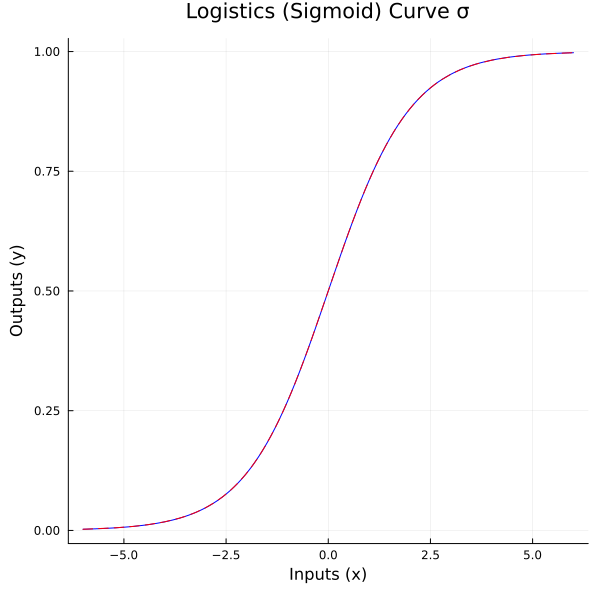

In [7]:
# re-plot

plot!(hₛ, color = :red, linestyle = :dash)

In [8]:
### Let's play with the parameters

θ₀ = 1.0


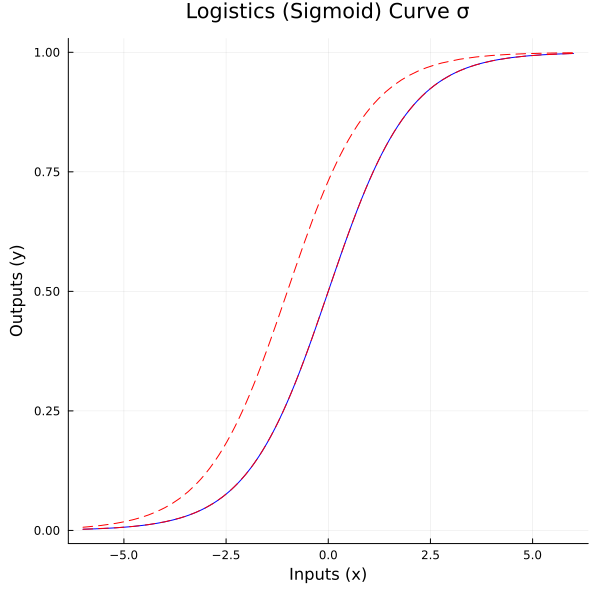

In [9]:
θ₀ = 1.0;  @show θ₀; # y-intercept (default = 0 | try 1 & -1)
plot!(hₛ, color = :red, linestyle = :dash)

θ₀ = -1.0


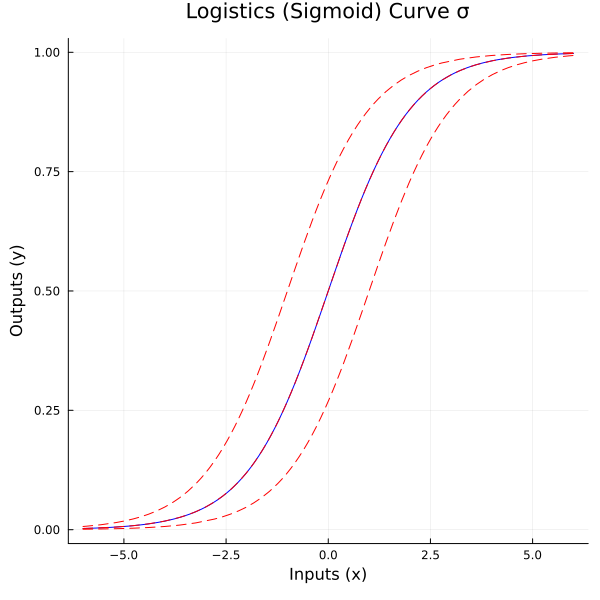

In [10]:
θ₀ = -1.0;  @show θ₀; # y-intercept (default = 0 | try 1 & -1)
plot!(hₛ, color = :red, linestyle = :dash)

θ₁ = 0.5


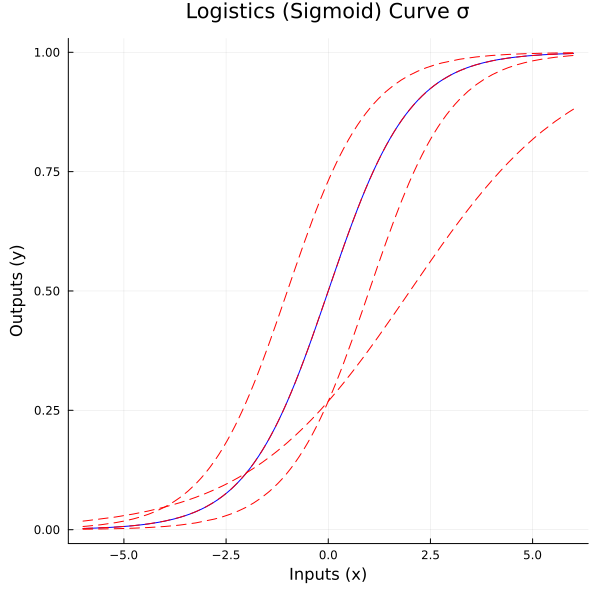

In [11]:
θ₁ = 0.5;  @show θ₁; # slope (default = 1 | try 0.5 & -0.5) 
plot!(hₛ, color = :red, linestyle = :dash)

θ₁ = -0.5


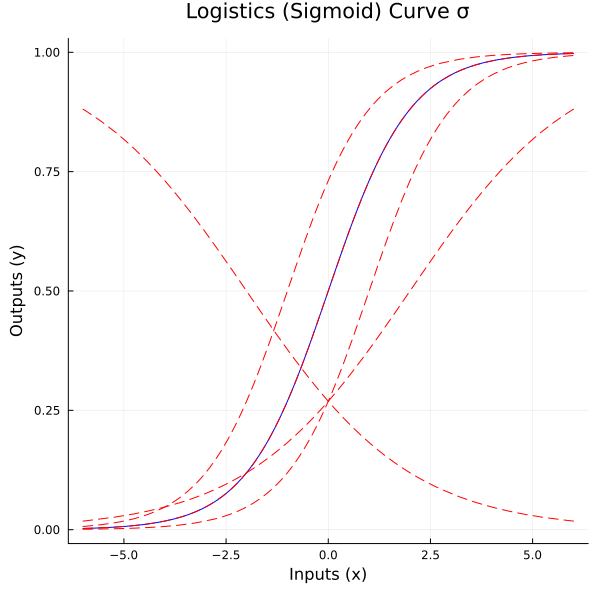

In [12]:
θ₁ = -0.5;  @show θ₁; # slope (default = 1 | try 0.5 & -0.5) 
plot!(hₛ, color = :red, linestyle = :dash)

## &#x1F9FE; Data Set

In [13]:
# use CSV package to import data from CSV file 
using CSV

In [14]:
data = CSV.File("data/wolfspider.csv");

In [15]:
x = data.feature
Y₀ = data.class;  # Y temp
Y = []
for i in 1:length(Y₀)
    if Y₀[i] == "present"
        y = 1.0
    else
        y = 0.0
    end
    push!(Y,y)
end

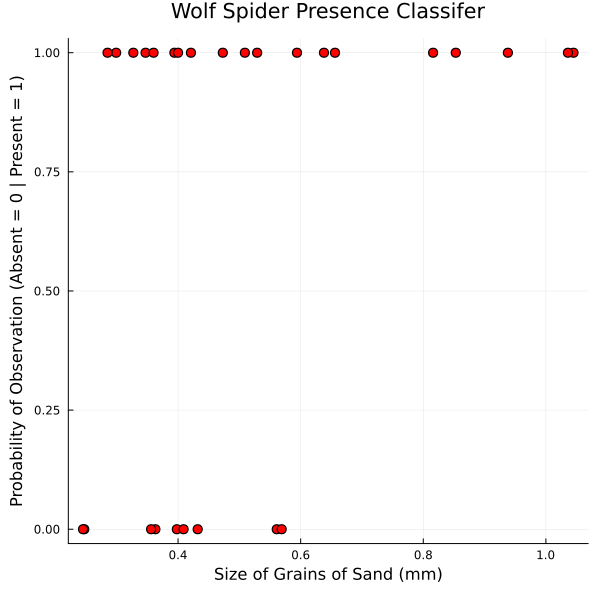

In [16]:
# plot data
Pₛₛₛ = scatter(x, Y,
    xlabel = "Size of Grains of Sand (mm)",
    ylabel = "Probability of Observation (Absent = 0 | Present = 1)",
    title = "Wolf Spider Presence Classifer",
    legend = false,
    color = :red,
    markersize = 5
)
    

In [17]:
###############################################################################################
# Logistic Regression Model
###############################################################################################

In [18]:
# initialize paramaters θₓ where ₓ ∈ [0,1]
θ₀ = 0.0;  @show θ₀; # y-intercept (default = 0 | try 1 & -1)
θ₁ = 1.0;  @show θ₁; # slope (default = 1 | try 0.5 & -0.5) 

θ₀ = 0.0
θ₁ = 1.0


In [21]:
# track parameters value history
θ₀_history = []; push!(θ₀_history, θ₀)
θ₁_history = []; push!(θ₁_history, θ₁);

In [25]:
# Define hypothesis function hₛ

# parameter function θₚ(x)
θₚ(x) = θ₀ .+ θ₁ * x

# hypotheses function
hₛ(x) = 1 ./ (1 .+ exp.(-θₚ(x)))


hₛ (generic function with 1 method)

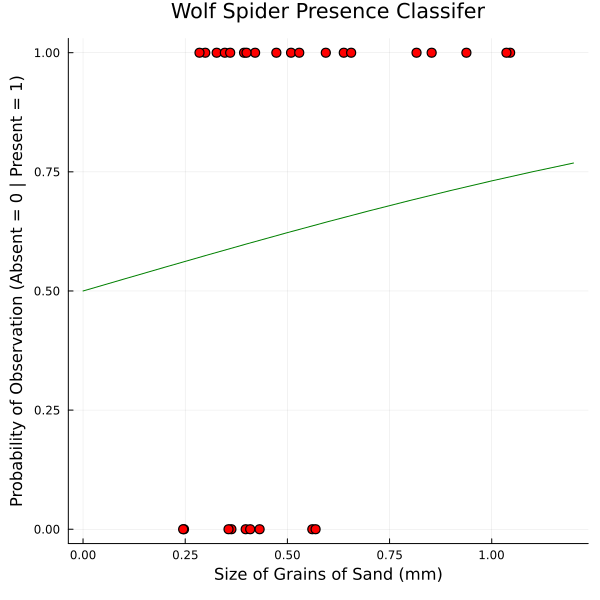

In [26]:
# plot initial hypothesis
plot!(0:0.1:1.2, hₛ, color = :green)

We only see the x data that are between 0 and 1, hence not the entire sigmoid function is displayed

### &#x1F4B0; Using a cost function

$$
\begin{gather}
- \frac{1}{m} \left[ \sum_{i = 1}^m y_i \; log \; h_\theta(x_i) + ( 1 - y_i)log(1 - h_\theta(x_i)) \right]
\\
\text{ Source: Andrew Ng }
\end{gather}
$$

In [39]:
# Define the cost (or loss) function from Andrew Ng
function cost(m, Ŷ)
    @. (-1 / m) * ∑( Y * log(Ŷ) + (1 - Y) * log(1 - Ŷ)  )
end

cost (generic function with 2 methods)

In [40]:
# Use the cost (or loss) function from Andrew Ng

m = length(x)
Ŷ = hₛ(x);

J = cost(m, Ŷ);

# track cost value history
J_history = []; push!(J_history, J);

#### &#x1F32A; Define batch gradient decent algorithm

$$
\begin{gather}
\sum_{i = 1}^m ( h_\theta(x_i)  - y_i) x_ij
\\
\text{ Source: Andrew Ng }
\end{gather}
$$



In [44]:
# use partial derivative
function ∂θ₀(Ŷ, Y) # for the θ₀ intercept parameter
     ∑(Ŷ - Y)
end

function ∂θ₁(Ŷ, Y, x) # for the θ₁ intercept parameter
     @. ∑(Ŷ - Y) * x
end

∂θ₁ (generic function with 1 method)

##### &#x1F39B; `Hyperparameters` of the gradient decent algorithm
- The `learning rate` determines the size of the steps taken during the optimization process.
- An `epoch` is one complete pass through the entire training dataset during the training of a model.

In [46]:
# set learning rate (alpha)
α = 0.01
# initialize epochs
epochs = 0

0.01

In [ ]:
################################################################################################################
# begin iterations (repeat until convergence)
################################################################################################################



# References

- [ ] [\[05x03\] Logistic Regression | Classification | Supervised Learning | Machine Learning \[Julia\]](https://www.youtube.com/watch?v=fiB7vjlcx0w&t=1508s) by [doggo.jl](https://www.youtube.com/@doggodotjl)
- [ ] [Deriving the derivative of the sigmoid function for neural networks](https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/)
- [ ] [Derivative of the Sigmoid function](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)